# Which countries can be used as reference points for transparency in the COVID-19 vaccine procurement process?

* Especially import are countries from low-income and developing economies.
* And countries with poor governance.

A first analysis to identify these countries will be done using the Corruption Perceptions Index of Transparency International and the World Bank's annual GDP figures for 2019 measured in 2017 US dollars (PPP).

In [1]:
# Import the required packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Import annual GDP data by country.
annual_gdp = pd.read_csv('/Users/efesios659/open-contracting-partnership-covid-19-guide/Annual-GDP-by-country-2017-PPP-US-dollars.csv')
annual_gdp.head(20)
annual_gdp['2019'] = annual_gdp['2019'] / 1000000000
annual_gdp_2019 = annual_gdp[['Country Name', '2019']]
annual_gdp_2019.rename(columns={"Country Name" : "Country"}, inplace=True)
annual_gdp_2019.head(20)

,Country,2019
0,Aruba,NaN
1,Afghanistan,78.557607
2,Angola,212.285293
3,Albania,39.859773
4,Andorra,NaN
5,Arab World,6248.163116
6,United Arab Emirates,655.789432
7,Argentina,991.523444
8,Armenia,40.384118
9,American Samoa,NaN


In [9]:
# Import data from the Corruption Perceptions Index.
# First, install the xlrd module from NumPy.
!conda install -c anaconda xlrd --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/efesios659/opt/anaconda3

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.0                |           py37_0         3.0 MB  anaconda
    xlrd-1.2.0                 |           py37_0         186 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> anaconda::conda-4.9.0-py37_0

The following packages will be SUPERSEDED by a higher-priority channel:

  xlrd                                      

In [26]:
cpi = pd.read_excel('/Users/efesios659/open-contracting-partnership-covid-19-guide/2018_CPI_FullDataSet.xlsx',
                       sheet_name='CPI2018',
                       skiprows=range(2)
                   )
print('Data downloaded and read into a dataframe!')
cpi_score = cpi[['Country', 'CPI Score 2018']]
cpi_score.head()

Data downloaded and read into a dataframe!


,Country,CPI Score 2018
0,Denmark,88
1,New Zealand,87
2,Finland,85
3,Singapore,85
4,Sweden,85


In [39]:
# Join the cpi_score and annual_gdp_2019 data frames.

cpi_annual_gdp = annual_gdp_2019.merge(cpi_score, left_on = "Country", right_on = "Country")
print(cpi_annual_gdp)
cpi_annual_gdp.describe()
cpi_annual_gdp.rename(columns={'2019':'2019 GDP'}, inplace=True)

                  Country        2019  CPI Score 2018
0             Afghanistan   78.557607              16
1                  Angola  212.285293              19
2                 Albania   39.859773              36
3    United Arab Emirates  655.789432              70
4               Argentina  991.523444              40
..                    ...         ...             ...
152               Vanuatu    0.945532              46
153                Kosovo   20.396556              37
154          South Africa  730.913368              43
155                Zambia   61.985790              35
156              Zimbabwe   41.533793              22

[157 rows x 3 columns]


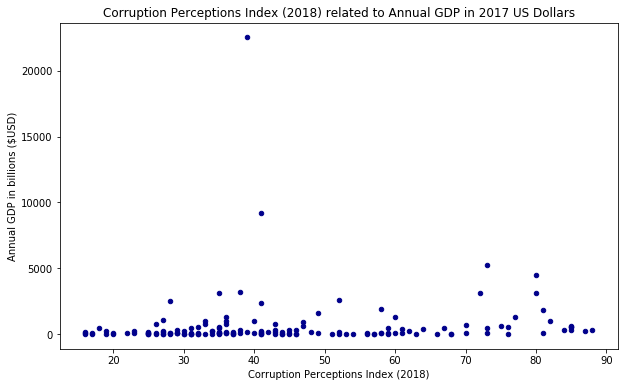

In [40]:
# Generate a scatter plot of the relationship between annual GDP and CPI.
cpi_annual_gdp.plot(kind='scatter', y='2019 GDP', x='CPI Score 2018', figsize=(10,6), color='darkblue')
plt.title('Corruption Perceptions Index (2018) related to Annual GDP in 2017 US Dollars')
plt.xlabel('Corruption Perceptions Index (2018)')
plt.ylabel('Annual GDP in billions ($USD)')
plt.show()

In [60]:
# List countries with low CPI (high corruption) and low GDP.
low_inc_poor_gov = cpi_annual_gdp.loc[(cpi_annual_gdp['CPI Score 2018'] < 40) & (cpi_annual_gdp['2019 GDP'] < 1000)]
pd.set_option('display.max_rows', None)
print(low_inc_poor_gov.sort_values(by=['CPI Score 2018','2019 GDP']))

# Nicaragua
# *** Guatemala https://www.guatemala.gob.gt/?s=COVID https://covid19.gob.gt/transparencia.html
# Honduras https://covid19honduras.org/ http://www.oncae.gob.hn/datosabiertos ** Seems to comply with OCDS 
# *** Paraguay https://www.controlciudadanopy.org/explore
# Bolivia https://www.boliviasegura.gob.bo/
# *** Ukraine https://www.open-contracting.org/2020/04/16/how-open-contracting-approaches-help-ukraine-to-tackle-covid-19/ 

                      Country    2019 GDP  CPI Score 2018
56          Equatorial Guinea   25.164393              16
0                 Afghanistan   78.557607              16
123                     Sudan  168.280513              16
9                     Burundi    8.667121              17
81                      Libya  102.842173              17
68                       Iraq  427.736513              18
137                      Chad   25.190111              19
1                      Angola  212.285293              19
63                      Haiti   32.724184              20
77                   Cambodia   72.356151              20
156                  Zimbabwe   41.533793              22
97                 Mozambique   38.910791              23
150                Uzbekistan  235.021065              23
140                Tajikistan   31.502698              25
105                 Nicaragua   35.392319              25
89                 Madagascar   44.419019              25
30            

In [61]:
# Identify high income countries with strong governance.
high_inc_strong_gov = cpi_annual_gdp.loc[(cpi_annual_gdp['CPI Score 2018'] > 75) & (cpi_annual_gdp['2019 GDP'] < 3000)]
print(high_inc_strong_gov.sort_values(by=['CPI Score 2018','2019 GDP']))

# Canada https://buyandsell.gc.ca/supplying-goods-and-services-in-support-of-canada-s-response-to-covid-19
# United States https://www.acquisition.gov/coronavirus
# New Zealand https://covid19.govt.nz/ https://www.procurement.govt.nz/about-us/news/covid-19-procurement-update-for-agencies/
# Denmark https://um.dk/en/about-us/procurement/contracts/short/contract-opportunitie/ https://home.kpmg/xx/en/home/insights/2020/04/denmark-government-and-institution-measures-in-response-to-covid.html
# Singapore https://www.gov.sg/ 
# https://www.twobirds.com/~/media/pdfs/in-focus/coronavirus/lsh-tracker/bird--bird-public-procurement-singapore.pdf?la=en&hash=8091C7175D6BFD03070F6881951E97FEDE7A9903
# https://www.mof.gov.sg/news-publications/parliamentary-replies/government's-procurement-of-goods-and-services-during-covid-19-pandemic

         Country     2019 GDP  CPI Score 2018
69       Iceland    20.187985              76
7        Austria   498.780948              76
6      Australia  1264.514452              77
85    Luxembourg    70.966644              81
25        Canada  1843.053386              81
106  Netherlands   986.847703              82
107       Norway   340.303211              84
49       Finland   268.662685              85
135       Sweden   547.595700              85
125    Singapore   555.193783              85
26   Switzerland   588.472101              85
109  New Zealand   210.877927              87
41       Denmark   336.335488              88
